In [25]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
# 设置putText函数字体
font = cv.FONT_HERSHEY_SIMPLEX
#计算两边夹角额cos值


def angle_cos(p0, p1, p2):
    d1, d2 = (p0-p1).astype('float'), (p2-p1).astype('float')
    return abs(np.dot(d1, d2) / np.sqrt(np.dot(d1, d1)*np.dot(d2, d2)))


def find_squares(img):
	squares = []
	img = cv.GaussianBlur(img, (3, 3), 0)
	gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
	bin = cv.Canny(gray, 30, 100, apertureSize=3)
	contours, _hierarchy = cv.findContours(
		bin, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
	print("轮廓数量：%d" % len(contours))
	print(contours)
	index = 0
	# 轮廓遍历
	for cnt in contours:
		cnt_len = cv.arcLength(cnt, True)  # 计算轮廓周长
		cnt = cv.approxPolyDP(cnt, 0.02*cnt_len, True)  # 多边形逼近
		# 条件判断逼近边的数量是否为4，轮廓面积是否大于1000，检测轮廓是否为凸的
		# if len(cnt) >= 4 and cv.contourArea(cnt) > 10 and cv.isContourConvex(cnt):
		if len(cnt) >= 2 and cv.contourArea(cnt) > 10 :
			M = cv.moments(cnt)  # 计算轮廓的矩
			cx = int(M['m10']/M['m00'])
			cy = int(M['m01']/M['m00'])  # 轮廓重心

			cnt = cnt.reshape(-1, 2)
			# max_cos = np.max(
			# 		[angle_cos(cnt[i], cnt[(i+1) % 4], cnt[(i+2) % 4]) for i in range(4)])
		# 只检测矩形（cos90° = 0）
		# if max_cos < 0.1:
			# 检测四边形（不限定角度范围）
			index = index + 1
			cv.putText(img, ("#%d" % index), (cx, cy),
						font, 0.7, (255, 0, 255), 2)
			squares.append(cnt)
	return squares, img





轮廓数量：166
(array([[[336, 207]]], dtype=int32), array([[[ 19, 199]],

       [[ 19, 200]],

       [[ 18, 201]],

       [[ 17, 201]],

       [[ 17, 202]],

       [[ 16, 203]],

       [[ 13, 203]],

       [[ 12, 204]],

       [[ 10, 204]],

       [[  9, 205]],

       [[  8, 205]],

       [[  7, 206]],

       [[  6, 206]],

       [[  5, 207]],

       [[  0, 207]],

       [[  5, 207]],

       [[  6, 206]],

       [[  7, 206]],

       [[  8, 205]],

       [[  9, 206]],

       [[ 11, 204]],

       [[ 12, 204]],

       [[ 13, 203]],

       [[ 16, 203]],

       [[ 17, 202]],

       [[ 19, 202]],

       [[ 18, 201]],

       [[ 19, 200]]], dtype=int32), array([[[345, 193]],

       [[344, 194]],

       [[344, 196]],

       [[345, 197]],

       [[344, 198]],

       [[344, 199]],

       [[343, 200]],

       [[341, 200]],

       [[338, 197]],

       [[337, 197]],

       [[336, 196]],

       [[335, 197]],

       [[334, 197]],

       [[334, 198]],

       [[333, 19

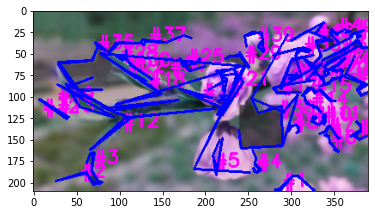

Done


In [24]:
def main():
    img = cv.imread(
        "def find_squares(img):
	squares=[]
	img=cv.GaussianBlur(img, (3, 3), 0)
	gray=cv.cvtColor(img, cv.COLOR_BGR2GRAY)
	bin=cv.Canny(gray, 30, 100, apertureSize=3)
	contours, _hierarchy=cv.findContours(
		bin, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
	print("轮廓数量：%d" % len(contours))
	index=0
	# 轮廓遍历
	for cnt in contours:
          		cnt_len = cv.arcLength(cnt, True)  # 计算轮廓周长
          		cnt = cv.approxPolyDP(cnt, 0.02*cnt_len, True)  # 多边形逼近
          		# 条件判断逼近边的数量是否为4，轮廓面积是否大于1000，检测轮廓是否为凸的
      		# if len(cnt) >= 4 and cv.contourArea(cnt) > 10 and cv.isContourConvex(cnt):
          		# if len(cnt) >= 4 and cv.contourArea(cnt) > 10 :
	M=cv.moments(cnt)  # 计算轮廓的矩
	cx=int(M['m10']/M['m00'])
	cy=int(M['m01']/M['m00'])  # 轮廓重心

	cnt=cnt.reshape(-1, 2)
	max_cos=np.max(
            [angle_cos(cnt[i], cnt[(i+1) % 4], cnt[(i+2) % 4]) for i in range(4)])
	# 只检测矩形（cos90° = 0）
	if max_cos < 0.1:
      		# 检测四边形（不限定角度范围）
          		#if True:
          		index=index + 1
          		cv.putText(img, ("#%d" % index), (cx, cy),
                       font, 0.7, (255, 0, 255), 2)
          		squares.append(cnt)
	return squares, img")
    squares, img = find_squares(img)
    print(squares)
    cv.drawContours(img, squares, -1, (0, 0, 255), 2)
    plt.imshow(img)
    plt.show()

    print('Done')


if __name__ == '__main__':
    main()
